# Linear regression using Gradient Descent
We will be using a dataset and the linear regression model to predict output for a new input. We will train the model using gradient descent algorithm, we will code this from scratch using some simple libraries like numpy. We will also look into another way of finding the parameters(weights) of model using Normal Equation. The notebook goes through the formula, code and plots required to understand linear regression and gradient descent.

    X      Y
0  19   46.2
1  13   15.7
2  40  119.4
3  57  170.9
4  23   56.9
shape of the data is (61, 2)


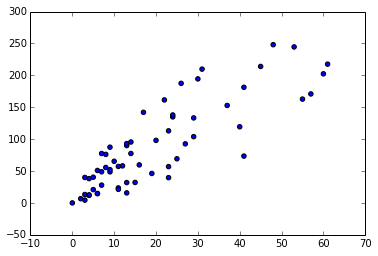

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


data = pd.read_csv("data.csv")
print(data.head())
print("shape of the data is " + str(data.shape))
x = data.iloc[:,0].values  # .values convert the dataframe to numpy array
y = data.iloc[:,1].values

plt.scatter(x,y)
plt.show()

# Error Function
We will need an error/loss function that we will have to minimize inorder to get the best fit for the model. There can be many different error functions that we can choose from, here we are using mean squared error. One can also use simple squared error or something similar.

$$  error =  \frac{1}{N} \sum (h - y)^2  $$

In the above formula,

N is the number of data points or total sample.

h is the output of oue model, h = m*x + c.

y is the actual target


This is the error function that we want to minimize
Above function can also be written as,

$$  error =  \frac{1}{N} \sum ((m*x + c) - y)^2  $$

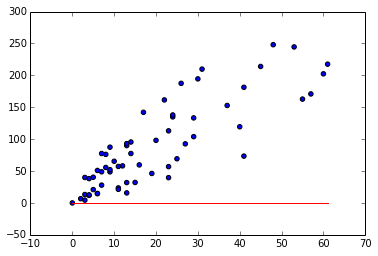



Mean Squared Error before training is 12260.2657377


In [3]:
N = 61  #number of rows in the data(number of datapoints)
# Let our model be  h = mx + c
m = 0
c = 0
h = m*x+c

plt.scatter(x,y)
plt.plot(x, h, color = 'r')
plt.show()

#We will use Mean squared error as our loss function that we want to minimize
error = (1/N)*np.sum((h-y)**2)
print("\n\nMean Squared Error before training is " + str(error))

# Normal Equation Method

Before we actually move on to gradient descent lets look at this method of finding parameter values using normal equation. We can directly find the parameter values that minimizes the below given loss function by using a formula. The Normal Equation is given as below,

$$  \theta =  (X^T X)^{-1}X^Ty  $$

Derivation of the above Normal Equation can be found [here](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression). Note that here the matrix X is the input martix with a columns of ones added in the begining. This formula gives us the values of theta directly for the best fit.

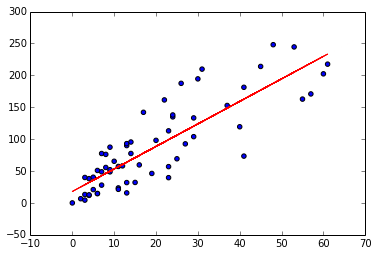

In [13]:
norm_x = np.vstack((np.ones(x.shape[0]), x)).T
norm_y = np.asarray([y]).T

#implementation of above formula
weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(norm_x.T , norm_x)), norm_x.T), norm_y)

plt.scatter(x,y)
plt.plot(x,weights[1]*x+weights[0], color = 'r')
plt.show()

# Gradient Descent

Now we will use gradient descent algo to find the best fit of the model then we can compare both the models by looking at the plots.

We take derivative of the error function with respect to the parameter which gives the slope and we move a little in the direction of the slope to minimize the error function.

$$  \frac{\partial (error)}{\partial m}  =  \frac{2}{N} \sum ((m*x + c) - y)*x $$
<br />
$$  \frac{\partial (error)}{\partial c}  =  \frac{2}{N} \sum ((m*x + c) - y) $$


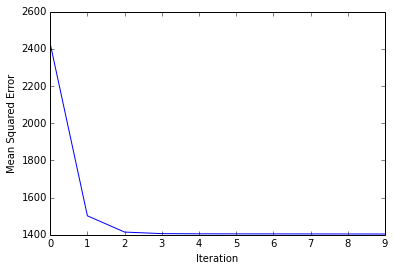



Mean Squared Error after training is 1404.25623281


In [4]:
iteration = 10
learning_rate = 0.001
errors = []  # we take this list to append error values into this for each iteration

for i in range(iteration):
    grad_m = 0
    grad_c = 0
    
    for j in range(N):
        grad_m += (m*x[j] + c - y[j]) * x[j]
        grad_c += (m*x[j] + c - y[j])
    
    #calculating the gradients
    grad_m = (2/N)*grad_m
    grad_c = (2/N)*grad_c
    
    #updating the weights according to learning rate and gradients
    m = m - (learning_rate * grad_m)
    c = c - (learning_rate * grad_c)
    
    errors.append((1/N)*np.sum(((m*x+c)-y)**2))

# plotting the graph of iteration vs error 
# We can see the error going down using the gradient decent method
plt.plot(np.arange(iteration),errors)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

print("\n\nMean Squared Error after training is " + str(errors[iteration -1]))

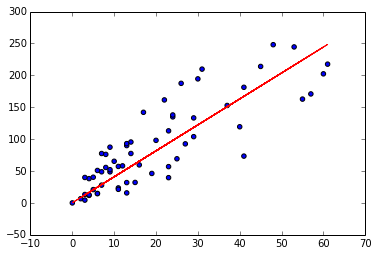

0.264489752459


In [6]:
plt.scatter(x,y)
plt.plot(x,m*x+c, color = 'r')
plt.show()

# Conclusion 
We have used Gradient Descent method to reduce the error of our linear regression model.
When we first started out the regression line was randomly initialized then we applied gradient decent and the error went on minimizing with iterations and reached staturation at a point. After this error wont fall any further and the error function has reached its global minima.
Finally we plot the response of the model with the same dataset.